<a href="https://colab.research.google.com/github/JayasreeThyadi/Webscraping-IMDb/blob/main/webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Web Scraping

In [2]:
#importing the libraries needed 
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

In [3]:
headers = {"Accept-Language": "en-US,en;q=0.5"}

movie_name = []
year = []
time=[]
rating=[]
metascore =[]
votes = []
gross = []
description = []
director=[]
cast=[]
genre=[]

pages = np.arange(1,4000,100)

for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?title_type=feature&primary_language=hi&sort=num_votes,desc&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')

    movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
    sleep(randint(2,8))

    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)
        
        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text.strip('()')
        year.append(year_of_release)
        
        runtime = store.p.find("span", class_ = 'runtime').text if store.p.find("span", class_='runtime') else " "
        time.append(runtime)

        genrE = store.p.find("span", class_='genre').text.replace('\n','') if store.p.find("span", class_='genre') else " "
        genre.append(genrE)

        rate = store.find('div', class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
        rating.append(rate)
        
        meta = store.find('span', class_ = "metascore").text if store.find('span', class_ = "metascore") else " "
        metascore.append(meta)

        path = store.find_all('p')

        direct = path[2].get_text(strip=True).split('|')[0]
        #dirEct = directt.split(':')[1]
        director.append(direct)

                      
        value = store.find_all('span', attrs = {'name': "nv"})
        
        vote = value[0].text
        votes.append(vote)
        
        grosses = value[1].text if len(value)>1 else ' '
        gross.append(grosses)
        
        describe = store.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else ' '
        description.append(description_)
            
        
#creating a dataframe 
movie_list = pd.DataFrame({ "Movie Title": movie_name, "Year of Release" : year, "Director":director, "Genre":genre, "Runtime": time,"IMDb Rating": rating, "IMDb Votes" : votes, "Metascore": metascore, "Gross": gross, "Plot Outline": description  })

In [4]:
movie_list.head(5)

,Movie Title,Year of Release,Director,Genre,Runtime,IMDb Rating,IMDb Votes,Metascore,Gross,Plot Outline
0,3 Idiots,2009,Director:Rajkumar Hirani,"Comedy, Drama",170 min,8.4,"364,878",67,$6.53M,Two friends are searching for their long lost ...
1,Like Stars on Earth,2007,"Directors:Aamir Khan,Amole Gupte","Drama, Family",165 min,8.4,"179,337",,$1.22M,An eight-year-old boy is thought to be a lazy ...
2,PK,2014,Director:Rajkumar Hirani,"Comedy, Drama, Musical",153 min,8.1,"171,314",,$10.62M,An alien on Earth loses the only device he can...
3,Radhe,2021,Director:Prabhu Deva,"Action, Crime, Thriller",135 min,1.8,"170,770",,,"After taking the dreaded gangster Gani Bhai, A..."
4,Dangal,2016,Director:Nitesh Tiwari,"Action, Biography, Drama",161 min,8.4,"169,465",,$12.39M,Former wrestler Mahavir Singh Phogat and his t...


In [5]:
# saving the data in excel format
#movie_list.to_excel("Top 1000 IMDb movies.xlsx")

# If you want to save the data in csv format
movie_list.to_csv("IMDb Bollywood Movies List.csv")

## Exploratory Data Analysis (EDA)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uplo = files.upload()

Saving IMDb Bollywood Movies List.csv to IMDb Bollywood Movies List (1).csv


In [9]:
movies = pd.read_csv('IMDb Bollywood Movies List (1).csv')
movies.head(2)

,Unnamed: 0,Movie_Title,Year_of_Release,Director,Genre,Runtime,IMDb_Rating,IMDb_Votes,Metascore,Gross,Plot_Outline
0,0,3 Idiots,2009,Director:Rajkumar Hirani,"Comedy, Drama",170 min,8.4,"3,64,795",67,$6.53M,Two friends are searching for their long lost ...
1,1,Like Stars on Earth,2007,"Directors:Aamir Khan,Amole Gupte","Drama, Family",165 min,8.4,"1,79,308",,$1.22M,An eight-year-old boy is thought to be a lazy ...


In [10]:
movies.shape

(2000, 11)

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2000 non-null   int64  
 1   Movie_Title      2000 non-null   object 
 2   Year_of_Release  2000 non-null   object 
 3   Director         1998 non-null   object 
 4   Genre            2000 non-null   object 
 5   Runtime          2000 non-null   object 
 6   IMDb_Rating      2000 non-null   float64
 7   IMDb_Votes       2000 non-null   object 
 8   Metascore        2000 non-null   object 
 9   Gross            2000 non-null   object 
 10  Plot_Outline     2000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 172.0+ KB


In [12]:
#column-wise null count here
movies.isnull().sum(axis=0).sort_values(ascending=False)

Director           2
Plot_Outline       0
Gross              0
Metascore          0
IMDb_Votes         0
IMDb_Rating        0
Runtime            0
Genre              0
Year_of_Release    0
Movie_Title        0
Unnamed: 0         0
dtype: int64

In [13]:
# row-wise null count here
movies.isnull().sum(axis=1).sort_values(ascending=False)

1628    1
1710    1
1999    0
669     0
657     0
       ..
1336    0
1337    0
1338    0
1339    0
0       0
Length: 2000, dtype: int64

In [14]:
# col wise null percentage
movies.isnull().sum(axis=0).sort_values(ascending=False)/len(movies) * 100

Director           0.1
Plot_Outline       0.0
Gross              0.0
Metascore          0.0
IMDb_Votes         0.0
IMDb_Rating        0.0
Runtime            0.0
Genre              0.0
Year_of_Release    0.0
Movie_Title        0.0
Unnamed: 0         0.0
dtype: float64

In [15]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

Director           0.1
Plot_Outline       0.0
Gross              0.0
Metascore          0.0
IMDb_Votes         0.0
IMDb_Rating        0.0
Runtime            0.0
Genre              0.0
Year_of_Release    0.0
Movie_Title        0.0
Unnamed: 0         0.0
dtype: float64

In [16]:
(movies.isnull().sum(axis=1).sort_values(ascending=False) > 5).sum()

0

In [17]:
movies = movies[movies.isnull().sum(axis=1).sort_values(ascending=False) <= 5]
movies.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Movie_Title,Year_of_Release,Director,Genre,Runtime,IMDb_Rating,IMDb_Votes,Metascore,Gross,Plot_Outline
0,0,3 Idiots,2009,Director:Rajkumar Hirani,"Comedy, Drama",170 min,8.4,"3,64,795",67,$6.53M,Two friends are searching for their long lost ...
1,1,Like Stars on Earth,2007,"Directors:Aamir Khan,Amole Gupte","Drama, Family",165 min,8.4,"1,79,308",,$1.22M,An eight-year-old boy is thought to be a lazy ...
2,2,PK,2014,Director:Rajkumar Hirani,"Comedy, Drama, Musical",153 min,8.1,"1,71,288",,$10.62M,An alien on Earth loses the only device he can...
3,3,Radhe,2021,Director:Prabhu Deva,"Action, Crime, Thriller",135 min,1.8,"1,70,717",,,"After taking the dreaded gangster Gani Bhai, A..."
4,4,Dangal,2016,Director:Nitesh Tiwari,"Action, Biography, Drama",161 min,8.4,"1,69,425",,$12.39M,Former wrestler Mahavir Singh Phogat and his t...


In [18]:

TempGenre = movies.Genre.str.split(',',expand=True).iloc[:,0:2]
TempGenre.columns=['genre_1','genre_2']
TempGenre.genre_2.fillna(TempGenre.genre_1,inplace=True)
TempGenre

,genre_1,genre_2
0,Comedy,Drama
1,Drama,Family
2,Comedy,Drama
3,Action,Crime
4,Action,Biography
...,...,...
1995,Horror,Mystery
1996,Romance,Romance
1997,Adventure,Drama
1998,Drama,Drama


In [19]:
movies = pd.concat([movies,TempGenre],axis=1)
movies

,Unnamed: 0,Movie_Title,Year_of_Release,Director,Genre,Runtime,IMDb_Rating,IMDb_Votes,Metascore,Gross,Plot_Outline,genre_1,genre_2
0,0,3 Idiots,2009,Director:Rajkumar Hirani,"Comedy, Drama",170 min,8.4,"3,64,795",67,$6.53M,Two friends are searching for their long lost ...,Comedy,Drama
1,1,Like Stars on Earth,2007,"Directors:Aamir Khan,Amole Gupte","Drama, Family",165 min,8.4,"1,79,308",,$1.22M,An eight-year-old boy is thought to be a lazy ...,Drama,Family
2,2,PK,2014,Director:Rajkumar Hirani,"Comedy, Drama, Musical",153 min,8.1,"1,71,288",,$10.62M,An alien on Earth loses the only device he can...,Comedy,Drama
3,3,Radhe,2021,Director:Prabhu Deva,"Action, Crime, Thriller",135 min,1.8,"1,70,717",,,"After taking the dreaded gangster Gani Bhai, A...",Action,Crime
4,4,Dangal,2016,Director:Nitesh Tiwari,"Action, Biography, Drama",161 min,8.4,"1,69,425",,$12.39M,Former wrestler Mahavir Singh Phogat and his t...,Action,Biography
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Sannata,1981,"Directors:Shyam Ramsay,Tulsi Ramsay","Horror, Mystery",125 min,6.5,49,,,Girdharilal a wealthy business man is murdered...,Horror,Mystery
1996,1996,Phir Kab Milogi,1974,Director:Hrishikesh Mukherjee,Romance,132 min,6.3,49,,,Sapna (Mala Sinha) is having fun meeting his e...,Romance,Romance
1997,1997,Parasmani,1963,Director:Babubhai Mistry,"Adventure, Drama, Fantasy",137 min,6.4,49,,,Paras delights the Emperor with his singing. H...,Adventure,Drama
1998,1998,Man Ki Aankhen,1970,Director:Raghunath Jhalani,Drama,,6.6,49,,,After working as a teacher in Delhi for severa...,Drama,Drama


In [28]:
movies.IMDb_Votes = movies['IMDb_Votes'].str.replace(",", "")
movies.head(2)

,Unnamed: 0,Movie_Title,Year_of_Release,Director,Genre,Runtime,IMDb_Rating,IMDb_Votes,Metascore,Gross,Plot_Outline,genre_1,genre_2
0,0,3 Idiots,2009,Director:Rajkumar Hirani,"Comedy, Drama",170 min,8.4,364795,67,$6.53M,Two friends are searching for their long lost ...,Comedy,Drama
1,1,Like Stars on Earth,2007,"Directors:Aamir Khan,Amole Gupte","Drama, Family",165 min,8.4,179308,,$1.22M,An eight-year-old boy is thought to be a lazy ...,Drama,Family


In [31]:
movies['IMDb_Votes'] = movies['IMDb_Votes'].astype(int)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2000 non-null   int64  
 1   Movie_Title      2000 non-null   object 
 2   Year_of_Release  2000 non-null   object 
 3   Director         1998 non-null   object 
 4   Genre            2000 non-null   object 
 5   Runtime          2000 non-null   object 
 6   IMDb_Rating      2000 non-null   float64
 7   IMDb_Votes       2000 non-null   int64  
 8   Metascore        2000 non-null   object 
 9   Gross            2000 non-null   object 
 10  Plot_Outline     2000 non-null   object 
 11  genre_1          2000 non-null   object 
 12  genre_2          2000 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 218.8+ KB


Genre Distribution

In [62]:
genres = movies.groupby(['genre_1','genre_2']).IMDb_Votes.mean().sort_values(ascending=False)
genres

genre_1    genre_2             
Action      Biography              29763.1
Biography   Comedy                 28950.5
Action      Sci-Fi                 22445.0
Drama       History                13980.0
            Music                  12704.5
                                    ...   
Comedy      War                       60.0
Music       Romance                   56.0
Adventure   Drama                     56.0
Romance     Drama                     55.5
Action      Horror                    53.0
Name: IMDb_Votes, Length: 136, dtype: float64

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]), <a list of 11 Text major ticklabel objects>)

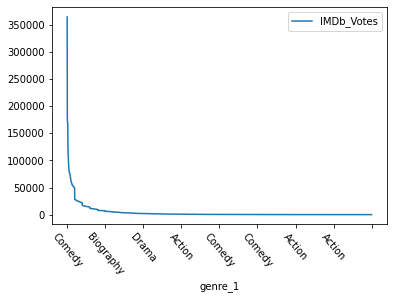

In [76]:
movies.plot(x='genre_1',y=['IMDb_Votes'],kind='line')
plt.xticks(rotation=-50)

Top10 Directors

In [36]:
top10director = movies.groupby('Director').IMDb_Votes.mean().sort_values(ascending=False).head(10)
top10director

Director
Directors:Aamir Khan,Amole Gupte                      179308.0
Director:Rajkumar Hirani                              165942.0
Director:Mukesh Chhabra                               122907.0
Director:Nitesh Tiwari                                 84763.5
Director:Shimit Amin                                   77079.0
Director:Rakeysh Omprakash Mehra                       62573.0
Director:Vishnuvardhan                                 58591.0
Director:Anthony Maras                                 57465.0
Directors:Lawrence Raghavendra,Balakrishnan Thevar     55195.0
Director:Ramin Bahrani                                 52992.0
Name: IMDb_Votes, dtype: float64

Plot of IMDb Votes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


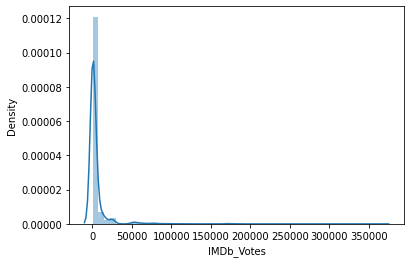

In [55]:
sns.distplot(movies['IMDb_Votes'])
plt.show()

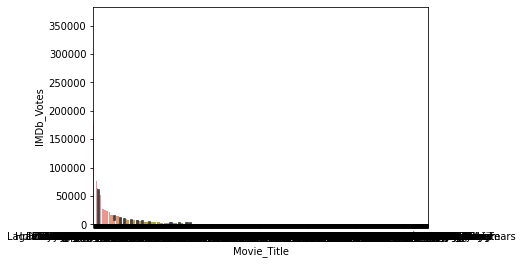

In [56]:
sns.barplot(x='Movie_Title',y='IMDb_Votes',data=movies)
plt.show()

Correlation Map

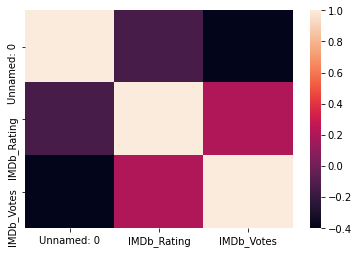

In [57]:
tc = movies.corr()
sns.heatmap(tc)
plt.show()

AttributeError: ignored

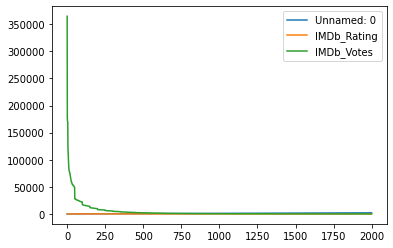

In [58]:
import matplotlib.pyplot as plt
movies.plot()
movies.show()